In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from solver import Solver
import os

mod008inf.mps 672 672 1006 670
stein9inf.mps 46 46 67 44
supportcase14.mps 270 254 304 242
stein45inf.mps 1082 1136 1645 1096
f2gap40400.mps 708 490 735 490
supportcase16.mps 202 256 271 220
p0201.mps 2336 1954 1954 1954
stein15inf.mps 96 94 136 90

In [ ]:
results = {}
with open("results.txt", "w") as results_file:
    for dir_name, _, filenames in os.walk("problems"):
        for filename in filenames:
            if filename == "problem_from_article.lp" or filename == "problem_from_article_mod.lp" or filename == "app2-1.mps":
                continue
            results[filename] = [None, None, None, None]
            results_file.write(filename)
            path = os.path.join(dir_name, filename)

            print(f"{filename} started solving with params: presolve - disable, cutting - disable.")
            sl = Solver(path, False, 0, True)
            _ = sl.solve()
            mip_state = sl.result()
            results[filename][0] = mip_state.number_of_relaxations
            objective = mip_state.primal_solution.objective
            results_file.write(f" {mip_state.number_of_relaxations}")

            print(f"{filename} started solving with params: presolve - enable, cutting - disable.")
            sl = Solver(path, True, 0, True)
            _ = sl.solve()
            mip_state = sl.result()
            results[filename][1] = mip_state.number_of_relaxations
            if objective is not None and abs(mip_state.primal_solution.objective - objective) > 1e-6:
                print(f"Objective not matched! {objective}, {mip_state.primal_solution.objective}")
                results_file.write(" not_matched!")
            results_file.write(f" {mip_state.number_of_relaxations}")

            print(f"{filename} started solving with params: presolve - enable, cutting - standard.")
            sl = Solver(path, True, 1, True)
            _ = sl.solve()
            mip_state = sl.result()
            results[filename][2] = mip_state.number_of_relaxations
            if objective is not None and abs(mip_state.primal_solution.objective - objective) > 1e-6:
                print(f"Objective not matched! {objective}, {mip_state.primal_solution.objective}")
                results_file.write(" not_matched!")
            results_file.write(f" {mip_state.number_of_relaxations}")

            print(f"{filename} started solving with params: presolve - enable, cutting - yolo.")
            sl = Solver(path, True, 2, True)
            _ = sl.solve()
            mip_state = sl.result()
            results[filename][3] = mip_state.number_of_relaxations
            if objective is not None and abs(mip_state.primal_solution.objective - objective) > 1e-6:
                print(f"Objective not matched! {objective}, {mip_state.primal_solution.objective}")
                results_file.write(" not_matched!")
            results_file.write(f" {mip_state.number_of_relaxations}\n")

p0201.mps started solving with params: presolve - disable, cutting - disable.
p0201.mps started solving with params: presolve - enable, cutting - disable.
p0201.mps started solving with params: presolve - enable, cutting - standard.
p0201.mps started solving with params: presolve - enable, cutting - yolo.
stein15inf.mps started solving with params: presolve - disable, cutting - disable.
stein15inf.mps started solving with params: presolve - enable, cutting - disable.
stein15inf.mps started solving with params: presolve - enable, cutting - standard.
stein15inf.mps started solving with params: presolve - enable, cutting - yolo.


In [10]:
def node_label(node) -> str:
    if node.bound.upper - node.bound.lower <= 1e-9:
        return f"{node.var.name} = {node.bound.upper}\nI={node.iteration} D={node.depth}"
    else:
        return f"{node.bound.lower}≤{node.var.name}≤{node.bound.upper}\nI={node.iteration} D={node.depth}"

def node_color(idx, node, origins, fuips = None):
    #print(node.var, node.iteration, node.bound)
    if fuips is not None and idx in fuips:
        return "red"
    if idx in origins:
        return "green"
    elif node.bound.upper - node.bound.lower <= 1e-9:
        return "blue"
    elif node.var.is_general:
        return "yellow"
    return "magenta"

In [11]:
def get_pos(nodes):
    graph = {}
    for node in nodes.values():
        if (node.depth, node.iteration) not in graph:
            graph[(node.depth, node.iteration)] = [node]
        else:
            graph[(node.depth, node.iteration)].append(node)

    gr = sorted(graph.items())

    current_x = 0
    current_y = 0
    x_step, y_step = 1, -1
    current_depth = 0
    res = {}
    for (depth, it), gr_nodes in gr:
        if depth == 0 and it == 0:
            current_y = -1
        if depth != current_depth:
            current_y = 0
        for node in gr_nodes:
            res[node_label(node)] = (current_x, current_y)
            current_x += x_step
        current_y += y_step
        current_depth = depth

    return res

In [13]:
sl = Solver(path_to_problem="problems/supportcase16.mps", 
            with_presolve=True,
            cutting_check=False,
            cutting_mod=1,
            silent=True,
            trivial_graph_cut=False,
            use_dropped=False,
            fuip_size=2)
graphes = sl.solve()
print(sl.result())

MipState [State.Converged] {
	primal value: 288.0
	primal solution: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0]
	dual value: 285.0
	dual solution: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5]
	number of branches: 141
	number of relaxations: 282
	number of non trivial graph cuts: 50
	BranchabilityStatistic {
		Branchability.Branchable: 140
		Branchability.IntFeasible: 39
		Branchability.Infeasible: 74
		Branchability.Dropped: 29
		Branchability.Unknown: 0
	}
}


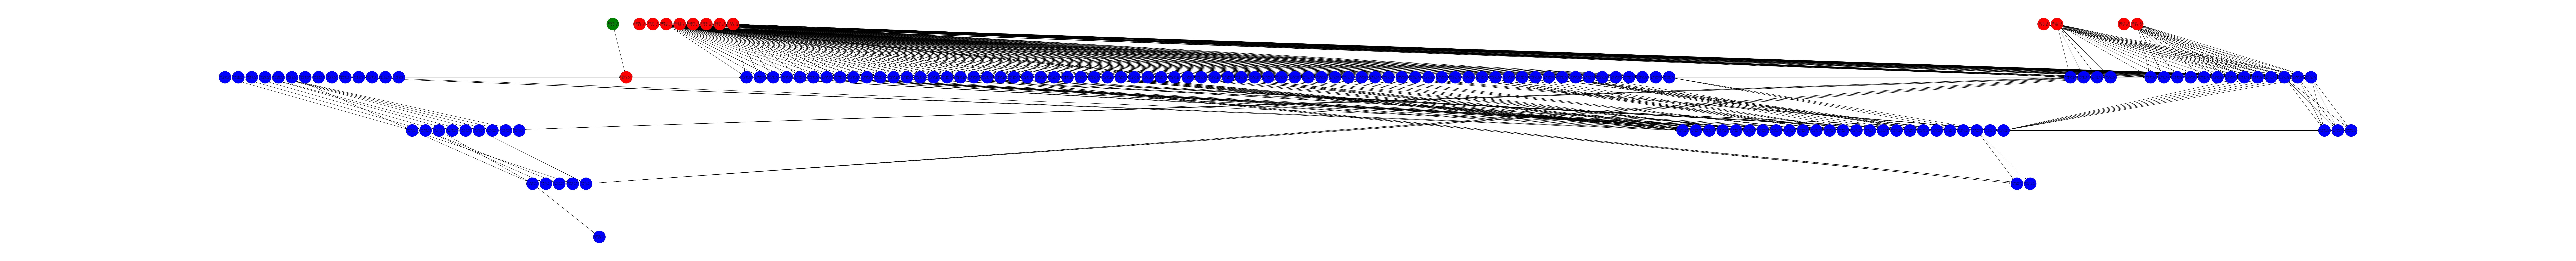

In [14]:
number_of_graph = 100
nodes, edges, origins = graphes[number_of_graph][0].to_plot_info()
fuips = graphes[number_of_graph][0].find_FUIP()
# for fuip in fuips:
#     print(node_label(graphes[number_of_graph][0].nodes[fuip]))

# for depth in graphes[number_of_graph][0].drains:
#     print(depth)
#     for node_idx in depth:
#         print(node_label(graphes[number_of_graph][0].nodes[node_idx]))
#     print()

G = nx.DiGraph()

for edge in edges:
    G.add_edge(node_label(nodes[edge[0]]), node_label(nodes[edge[1]]))

# for node_idx in origins:
#     G.add_node(node_label(nodes[node_idx]))

# pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
pos = get_pos(nodes)

plt.figure(3,figsize=(150,15)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        node_color=[node_color(idx, node, origins, fuips) for idx, node in nodes.items()]
       )

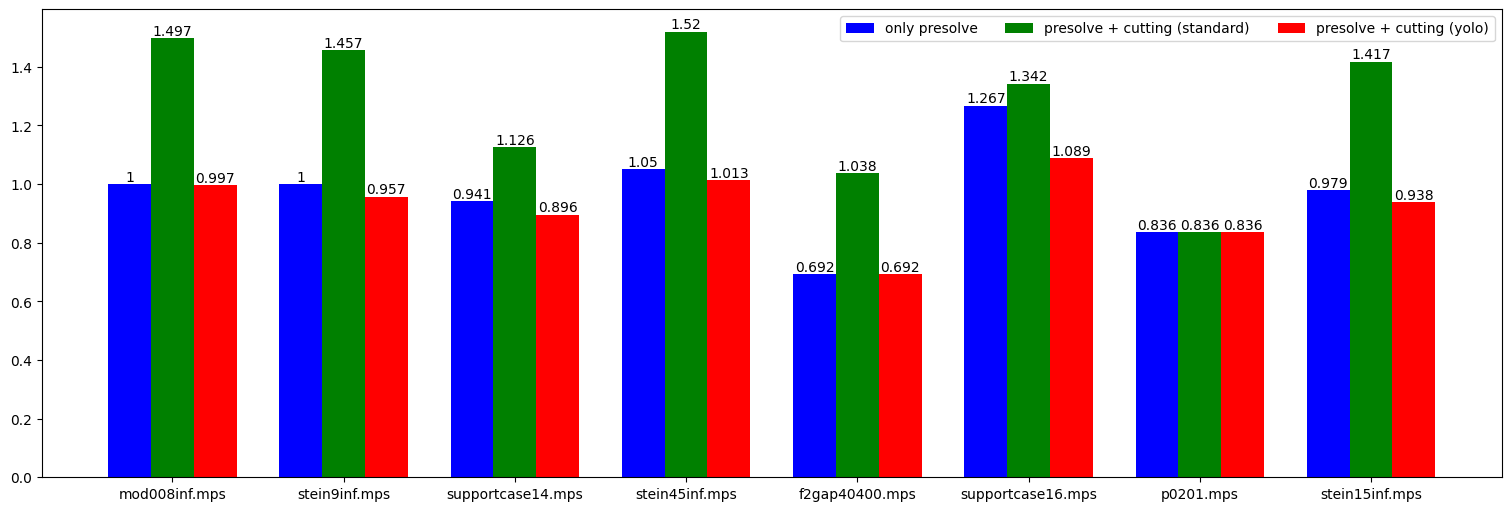

In [41]:
from matplotlib import pyplot as plt

with open("results.txt", "r") as file:
    lines = file.readlines()
    x_ax = 0
    width = 0.25
    multiplier = 0
    names = {}

    fig, ax = plt.subplots(layout='constrained', figsize=(15, 5))
    
    for line in lines:

        parsed_line = line.split(" ")
        numbers = list(map(lambda x: int(x.replace("\n", "")), parsed_line[1:]))
        for num_idx in range(1, len(numbers)):
            numbers[num_idx] = numbers[num_idx] / numbers[0]
            if num_idx == 1:
                color = "blue"
                label = "only presolve"
            elif num_idx == 2:
                color = "green"
                names[parsed_line[0]] = x_ax
                label = "presolve + cutting (standard)"
            else:
                color = "red"
                label = "presolve + cutting (yolo)"

            if len(names) == 0 or ((num_idx == 3 or num_idx == 2) and len(names) == 1):
                cont = ax.bar(x_ax, round(numbers[num_idx], 3), width, color=color, label=label)
            else:
                cont = ax.bar(x_ax, round(numbers[num_idx], 3), width, color=color)

            ax.bar_label(cont)
            x_ax += width
        x_ax += width

    #ax.set_ylabel('Length (mm)')
    #ax.set_title('Penguin attributes by species')
    ax.set_xticks(list(names.values()), list(names.keys()))
    ax.legend(ncols = 3)
    #ax.set_ylim(0, 1)

In [20]:
from tqdm.notebook import trange

name = "supportcase16"
use_dropped = False

res = []
for fuip_size in trange(0, 51):
    sl = Solver(path_to_problem=f"problems/{name}.mps", 
            with_presolve=True,
            cutting_check=False,
            cutting_mod=1,
            silent=True,
            trivial_graph_cut=False,
            use_dropped=use_dropped,
            fuip_size=fuip_size)
    _ = sl.solve()
    res.append(sl.result())

  0%|          | 0/51 [00:00<?, ?it/s]

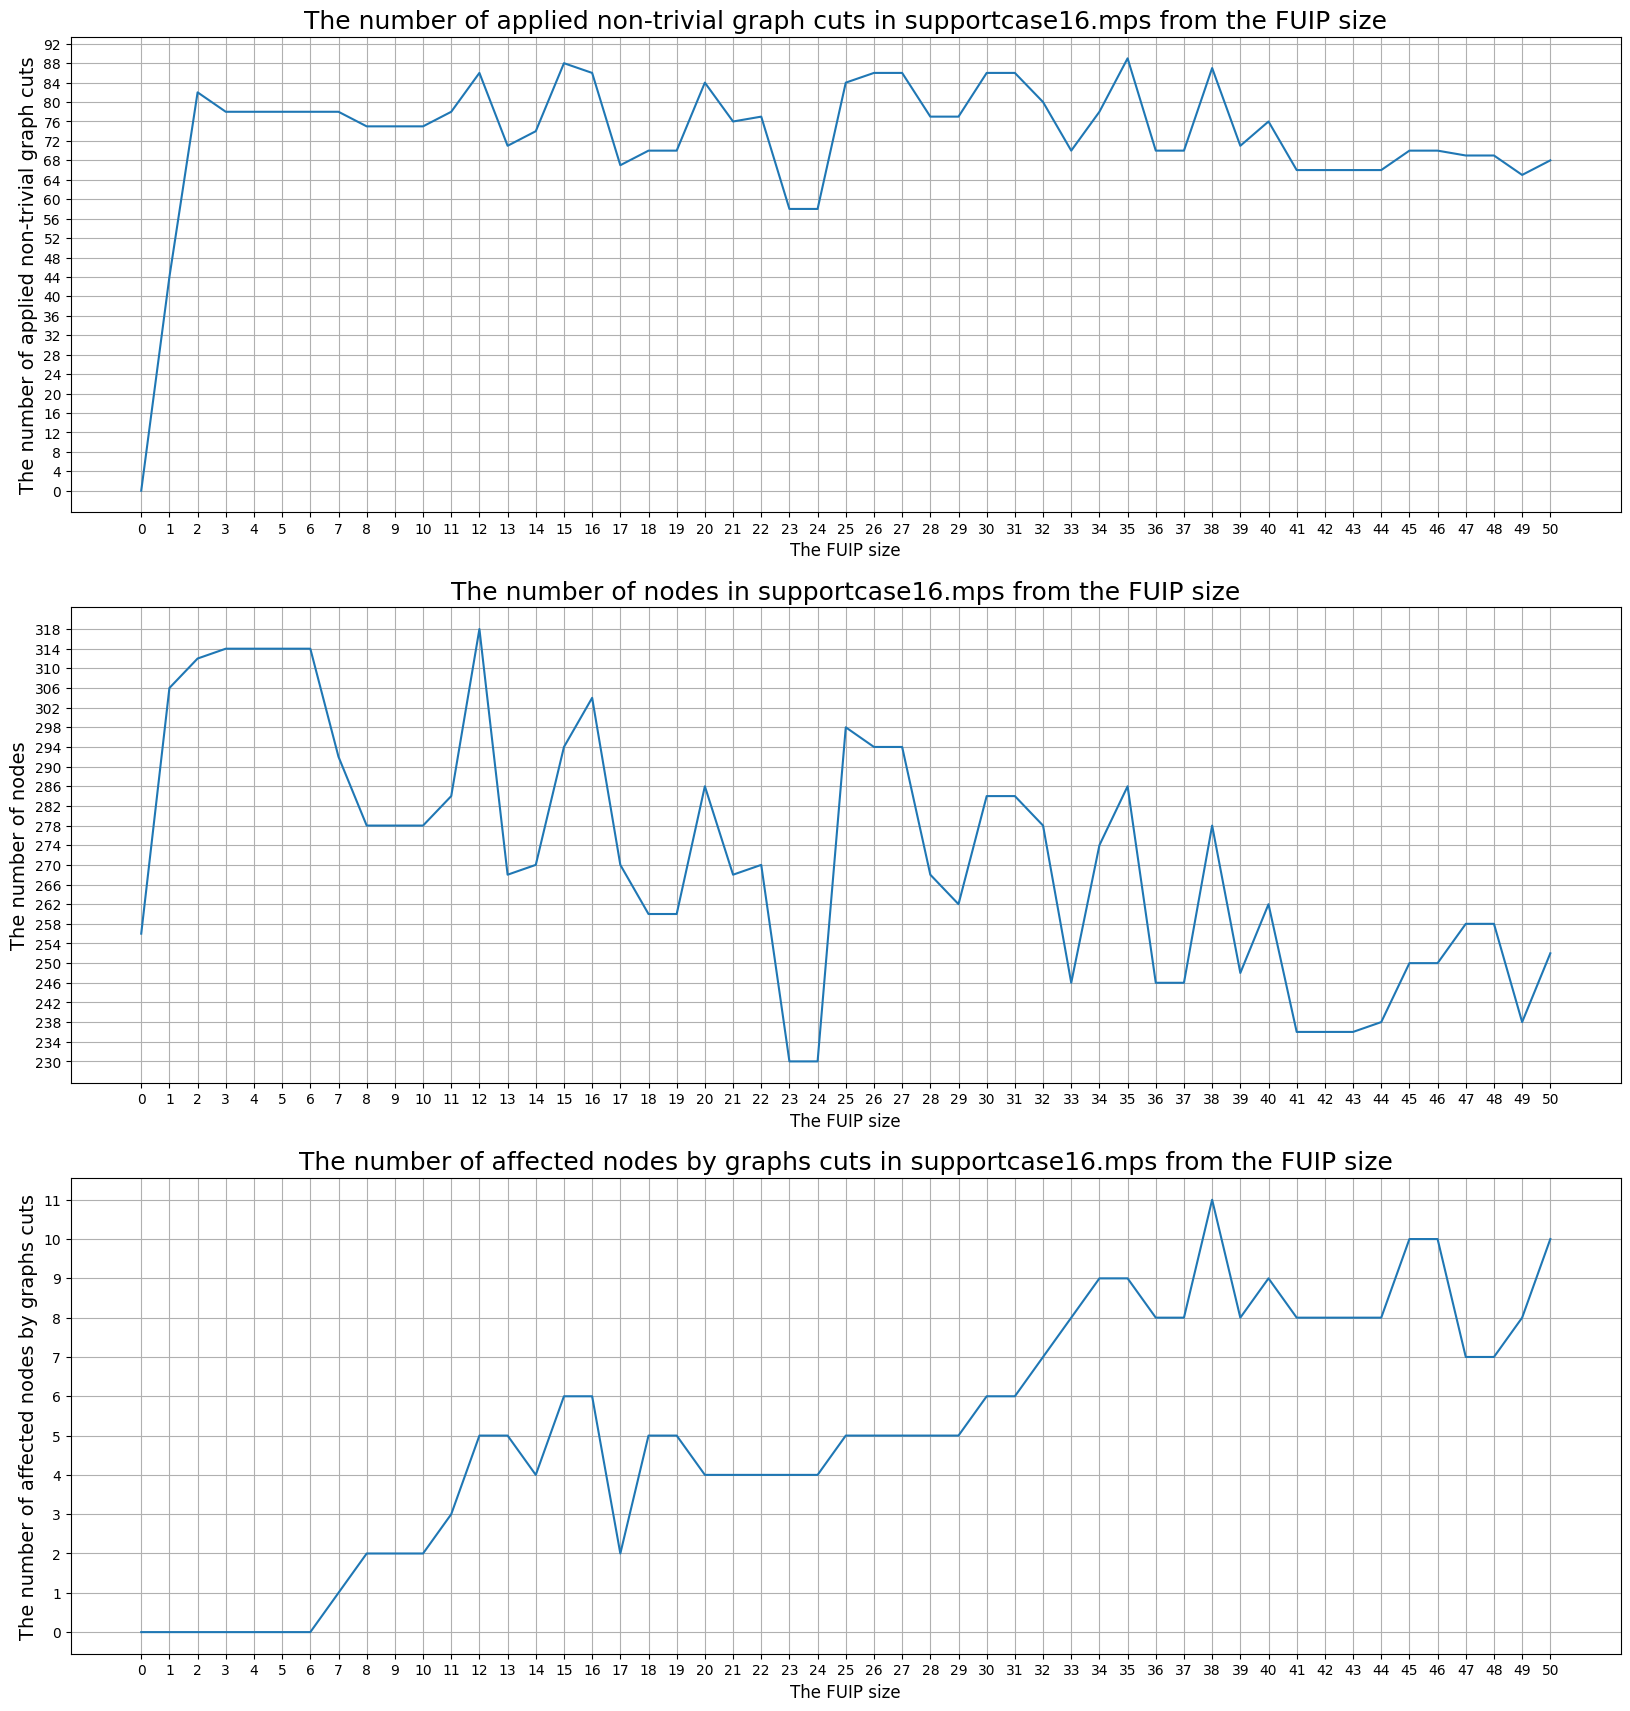

In [21]:
from matplotlib import pyplot as plt

dropped_text = ""
if use_dropped:
    dropped_text = " (with dropped nodes)"

fg, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 21))

ax1.plot(list(range(len(res))), list(map(lambda x: x.number_of_non_trivial_graph_cuts, res)))
ax1.set_xticks(list(range(len(res))), list(range(len(res))))
ax1.set_yticks(list(range(
                    min(map(lambda x: x.number_of_non_trivial_graph_cuts, res)),
                    max(map(lambda x: x.number_of_non_trivial_graph_cuts, res)) + 4, 4)), 
               list(range(
                    min(map(lambda x: x.number_of_non_trivial_graph_cuts, res)),
                    max(map(lambda x: x.number_of_non_trivial_graph_cuts, res)) + 4, 4)))
ax1.set_title(f"The number of applied non-trivial graph cuts in {name}.mps from the FUIP size{dropped_text}", fontsize=18)
ax1.set_xlabel("The FUIP size", fontsize=12)
ax1.set_ylabel("The number of applied non-trivial graph cuts", fontsize=14)
ax1.grid()

ax2.plot(list(range(len(res))), list(map(lambda x: x.number_of_relaxations, res)))
ax2.set_xticks(list(range(len(res))), list(range(len(res))))
ax2.set_yticks(list(range(
                    min(map(lambda x: x.number_of_relaxations, res)),
                    max(map(lambda x: x.number_of_relaxations, res)) + 4, 4)), 
               list(range(
                    min(map(lambda x: x.number_of_relaxations, res)),
                    max(map(lambda x: x.number_of_relaxations, res)) + 4, 4)))
ax2.set_title(f"The number of nodes in {name}.mps from the FUIP size{dropped_text}", fontsize=18)
ax2.set_xlabel("The FUIP size", fontsize=12)
ax2.set_ylabel("The number of nodes", fontsize=14)
ax2.grid()

ax3.plot(list(range(len(res))), list(map(lambda x: x.number_of_objective_changes, res)))
ax3.set_xticks(list(range(len(res))), list(range(len(res))))
ax3.set_yticks(list(range(
                    min(map(lambda x: x.number_of_objective_changes, res)),
                    max(map(lambda x: x.number_of_objective_changes, res)) + 1)), 
               list(range(
                    min(map(lambda x: x.number_of_objective_changes, res)),
                    max(map(lambda x: x.number_of_objective_changes, res)) + 1)))
ax3.set_title(f"The number of affected nodes by graphs cuts in {name}.mps from the FUIP size{dropped_text}", fontsize=18)
ax3.set_xlabel("The FUIP size", fontsize=12)
ax3.set_ylabel("The number of affected nodes by graphs cuts", fontsize=14)
ax3.grid()